# Forbes Richest Athletes 

<img src="https://i.ytimg.com/vi/NPOdcCfyUnw/maxresdefault.jpg" width="700" height="500" />

**Data Dictionary**
1. Name: Name of the athlete.
2. Nationality: Name of the country the athlete belongs to.
3. Current Rank: Rank in the corresponding Year.
4. Previous Year Rank: Rank in in the preceding year.
5. Sport: Name of the sports that athlete played that year.
6. Year: Current year of ranking.
7. earnings ( million) : Earnings of the athlete in millions in the corresponding year. 

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette("deep")
from warnings import filterwarnings
filterwarnings("ignore")

In [2]:
df = pd.read_csv("Forbes+Richest+Athletes+1990-2019.csv")

In [3]:
df.head()

,Name,Nationality,Current Rank,Previous Year Rank,Sport,Year,earnings ($ million)
0,Mike Tyson,USA,1,Not Listed,Boxing,1990,28.6
1,Buster Douglas,USA,2,Not Listed,Boxing,1990,26.0
2,Sugar Ray Leonard,USA,3,Not Listed,Boxing,1990,13.0
3,Ayrton Senna,Brazil,4,Not Listed,Auto Racing,1990,10.0
4,Alain Prost,France,5,Not Listed,Auto Racing,1990,9.0


In [6]:
df.isnull().sum()

Name                    0
Nationality             0
Current Rank            0
Previous Year Rank      0
Sport                   0
Year                    0
earnings ($ million)    0
dtype: int64

In [7]:
df.shape

(291, 7)

### Q1. Atheletes from which country have been listed most number of times in the Forbes Richest Athletes from 1990 to 2019?
[Hint: use countplot]

In [43]:
#by using logics:
df.groupby('Nationality')['Name'].describe(include='all').sort_values(by='count',ascending=False).reset_index()[['Nationality','count']]

,Nationality,count
0,USA,200
1,Germany,13
2,UK,13
3,Switzerland,11
4,Portugal,9
5,Argentina,8
6,Brazil,8
7,Canada,6
8,Italy,4
9,Finland,3


In [41]:
#from count column and 1st row, it is evident that USA has maximum representations

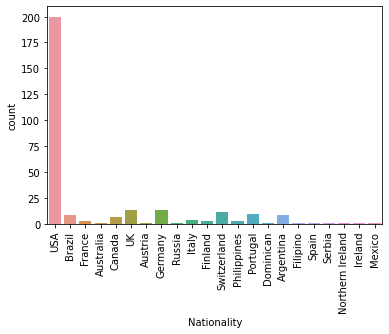

In [24]:
# or by countplot
sns.countplot(df['Nationality'])
plt.xticks(rotation=90)
plt.show()

### Q2. Make a plot visualizing year wise top earning (rank-1) athletes. In which year the rank 1 athlete earned the most? Which was the athlete who earned the most and what sport did he play? How much did the athlete earn?
[hint : use barplot]

In [32]:
df1=df[df['Current Rank']==1].sort_values(by='Year')
df1['Year']

,Name,Nationality,Current Rank,Previous Year Rank,Sport,Year,earnings ($ million)
0,Mike Tyson,USA,1,Not Listed,Boxing,1990,28.6
10,Evander Holyfield,USA,1,8,Boxing,1991,60.5
20,Michael Jordan,USA,1,3,Basketball,1992,35.9
30,Michael Jordan,USA,1,1,Basketball,1993,36.0
40,Michael Jordan,USA,1,1,Basketball,1994,30.0
50,Michael Jordan,USA,1,1,Basketball,1995,43.9
60,Mike Tyson,USA,1,2,Boxing,1996,75.0
70,Michael Jordan,USA,1,2,Basketball,1997,78.3
80,Michael Jordan,USA,1,Not Listed,Basketball,1998,69.0
90,Michael Schumacher,Germany,1,2,Auto Racing,1999,49.0


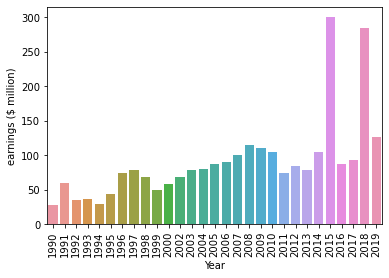

In [41]:
sns.barplot(y=df1['earnings ($ million)'],x=df1['Year'])
plt.xticks(rotation=90)
plt.show()

In [44]:
df1[df1.Year==2015]

,Name,Nationality,Current Rank,Previous Year Rank,Sport,Year,earnings ($ million)
241,Floyd Mayweather,USA,1,1,Boxing,2015,300.0


In [46]:
#or by logic
df[df['Current Rank']==1].sort_values(by='earnings ($ million)',ascending=False).head(1)

,Name,Nationality,Current Rank,Previous Year Rank,Sport,Year,earnings ($ million)
241,Floyd Mayweather,USA,1,1,Boxing,2015,300.0


### Q3. Which athlete has been most frequently ranked number 1 from 1990 to 2019? 
[Hint : use piechart]

In [62]:
#by logic
df1=pd.DataFrame(df[(df['Current Rank']==1)&(df.Year>1989)&(df.Year<2020)]['Name'].value_counts().reset_index())
df1

,index,Name
0,Tiger Woods,11
1,Michael Jordan,6
2,Floyd Mayweather,4
3,Mike Tyson,2
4,Cristiano Ronaldo,2
5,Michael Schumacher,2
6,Lionel Messi,1
7,Evander Holyfield,1


In [3]:
#another logic
df2=pd.DataFrame(df[(df.Year>1989)&(df.Year<2020)&(df['Current Rank']==1)].groupby('Name').nunique().sort_values(by='Year'))
df2

,Nationality,Current Rank,Previous Year Rank,Sport,Year,earnings ($ million)
Name,,,,,,
Evander Holyfield,1,1,1,1,1,1
Lionel Messi,1,1,1,1,1,1
Cristiano Ronaldo,1,1,2,1,2,2
Michael Schumacher,1,1,2,1,2,2
Mike Tyson,1,1,2,1,2,2
Floyd Mayweather,1,1,3,1,4,4
Michael Jordan,1,1,4,1,6,6
Tiger Woods,1,1,3,1,11,11


In [59]:
#answer Tiger Woods

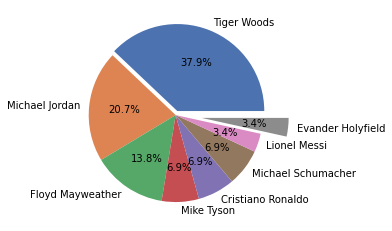

In [72]:
#pie chart
plt.pie(df1['Name'],labels=df1['index'],autopct='%0.1f%%',explode=[0.05,0.0,0.0,0.0,0.0,0.0,0.0,0.3])
plt.show()

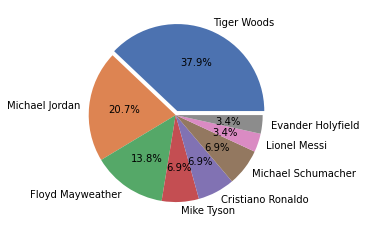

In [73]:
#or
df1=df[df['Current Rank']==1]
df2=pd.DataFrame(df1['Name'].value_counts().reset_index())
plt.pie(list(df2['Name']),labels=list(df2['index']),explode=[0.05,0.0,0.0,0.0,0.0,0.0,0.0,0.0],autopct='%0.1f%%')
plt.show()

### Q4. Players from which 2 sports have been listed least number of times in the Forbes RIchest Athletes List?
[Hint : Use swarmplot]

In [96]:
#by logic
df1=pd.DataFrame(df.groupby('Sport').nunique().sort_values(by='Name',ascending=True).reset_index()[['Sport','Name','earnings ($ million)']])
df1

,Sport,Name,earnings ($ million)
0,American Football / Baseball,1,1
1,MMA,1,1
2,cycling,1,1
3,motorcycle gp,1,3
4,F1 racing,2,13
5,Baseball,3,6
6,Ice Hockey,3,4
7,Soccer,5,29
8,Tennis,6,22
9,Golf,8,40


In [90]:
#As we can see, cycling and MMA are the sports that had the lowest density in terms of number of times players being listed
#in Forbes Richest athletes list. American Football/Baseball is not considered in the lowest density as it is not a unique game.
#Both these games were played by an athlete in year 1995.As seen in the graph both games uniquely doest not have low density.

In [92]:
df[df.Sport=='American Football / Baseball']

,Name,Nationality,Current Rank,Previous Year Rank,Sport,Year,earnings ($ million)
52,Deion Sanders,USA,3,>10,American Football / Baseball,1995,22.5


In [94]:
df[df.Sport=='American Football']

,Name,Nationality,Current Rank,Previous Year Rank,Sport,Year,earnings ($ million)
26,Joe Montana,USA,7,>10,American Football,1992,9.5
39,Joe Montana,USA,10,7,American Football,1993,11.5
64,Emmit Smith,USA,5,Not Listed,American Football,1996,16.5
133,Peyton Manning,USA,3,>10,American Football,2004,42.0
144,Michael Vick,USA,4,>10,American Football,2005,37.5
160,Tom Brady,USA,9,>10,American Football,2006,29.0
199,Eli Manning,USA,9,>10,American Football,2010,39.9
200,Terrell Suggs,USA,10,>10,American Football,2010,38.3
220,Peyton Manning,USA,10,7,American Football,2012,42.4
225,Drew Brees,USA,5,Not Listed,American Football,2013,51.0


In [97]:
df[df.Sport=='Baseball']

,Name,Nationality,Current Rank,Previous Year Rank,Sport,Year,earnings ($ million)
37,Cecil Fielder,USA,8,>10,Baseball,1993,12.7
89,Gary Sheffield,USA,10,Not Listed,Baseball,1998,17.2
127,Alex Rodriguez,USA,7,>10,Baseball,2003,26.0
139,Alex Rodriguez,USA,9,7,Baseball,2004,26.2
159,Alex Rodriguez,USA,9,>10,Baseball,2006,29.0
208,Alex Rodriguez,Dominican,8,>10,Baseball,2011,35.0


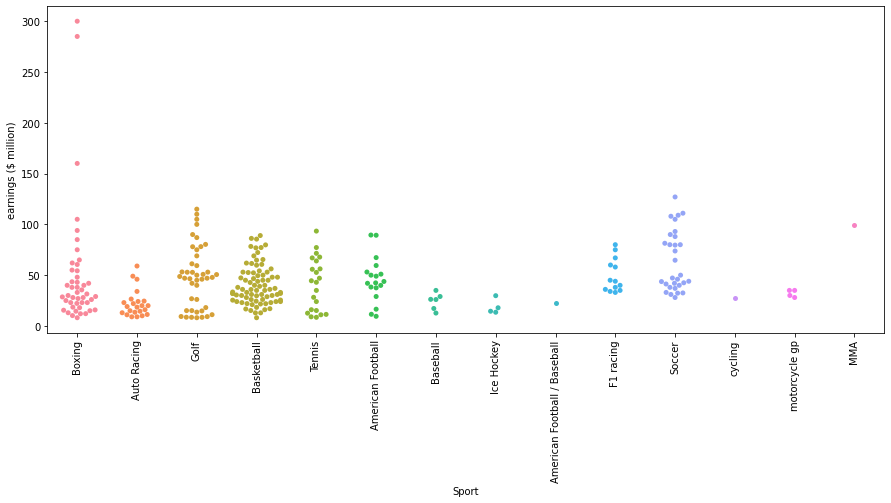

In [104]:
#by swarmplot
plt.figure(figsize = (15,6))
sns.swarmplot(df['Sport'],df['earnings ($ million)'])
plt.xticks(rotation=90)
plt.show()

In [105]:
#As we can see from the the plot, cycling and MMA are the sports that had the lowest density in terms of number of times players
#being listed in Forbes Richest athletes list.

In [ ]:
#refer above for 'American Football / Baseball'

### Q5. Discuss the relationship between Current rank and earnings with the help of a suitable plot.
[hint : use regplot]

<AxesSubplot:xlabel='Current Rank', ylabel='earnings ($ million)'>

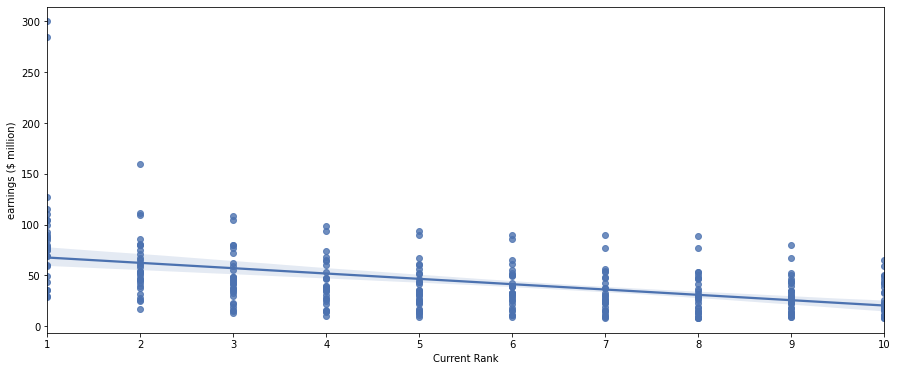

In [109]:
plt.figure(figsize=(15,6))
sns.regplot(df['Current Rank'],df['earnings ($ million)'])

In [ ]:
#As we can see from the plot, as the rank keeps going down, the earnings also keep decreasing.

### Q6. Which three sports have the highest spread in terms of earnings (highest IQR)?
[Hint : use boxplot]

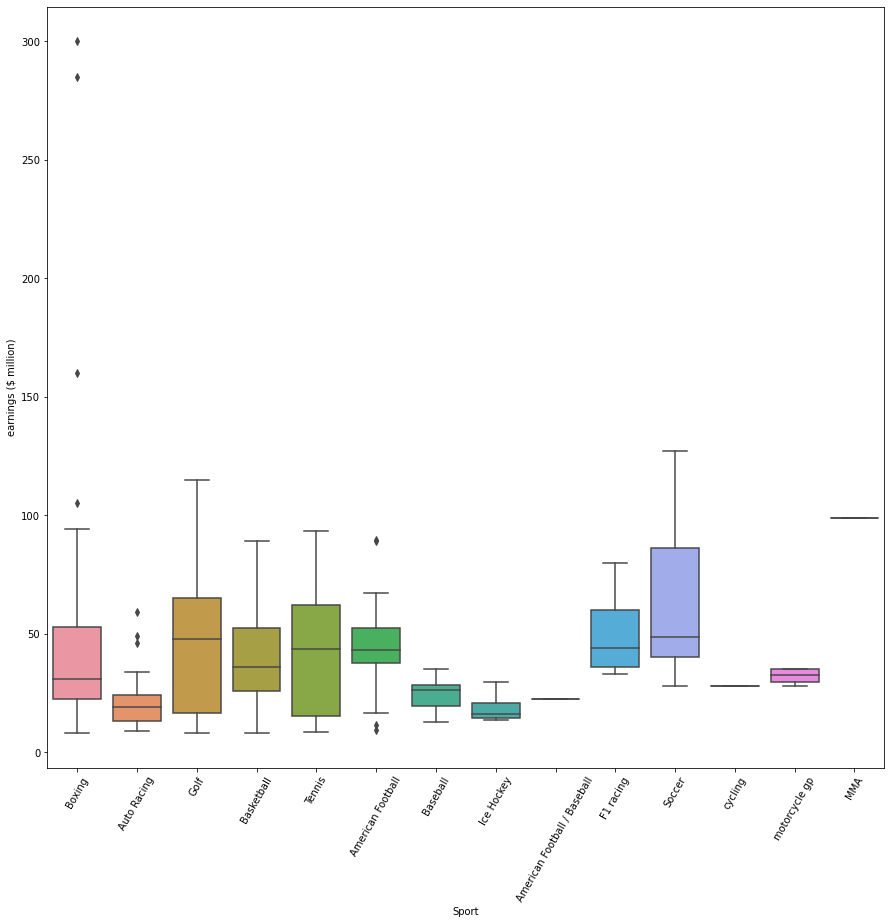

In [117]:
plt.figure(figsize=(15,14))
sns.boxplot(df['Sport'],df['earnings ($ million)'])
plt.xticks(rotation=60)
plt.show()

In [ ]:
#Golf, Tennis and Soccer are the three sports with highest IQR

### Q7. Show a trend in the positions at which Tiger Woods has appeared in the Forbes Richest Athletes list overs the years.
[Hint : Use lineplot]

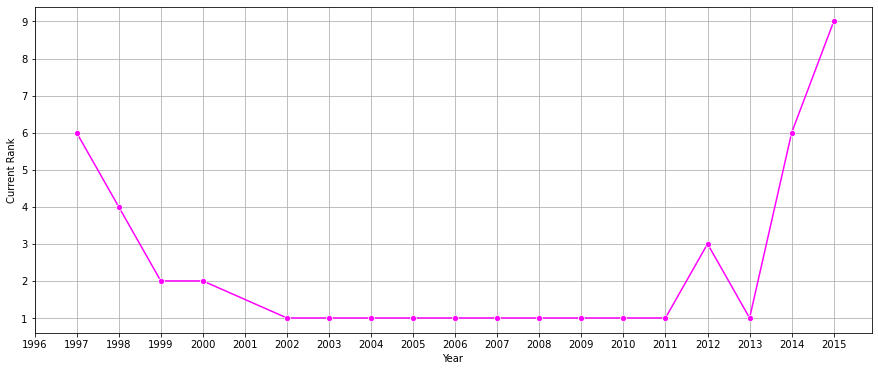

In [136]:
df1=df[df.Name=='Tiger Woods']
plt.figure(figsize=(15,6))
sns.lineplot(y=df1['Current Rank'],x=df1.Year,color='Magenta',marker='o')
plt.gca().invert_yaxis
plt.xticks(np.arange(1996,2016))
plt.grid(True)
plt.show()

In [ ]:
#As we can see from the plot, Tiger woods has consistently retained rank 1 from 2002 to 2011. He dropped to rank 3 in 2012 but
#regained his top position in 2013.

### Q8. Comment on the trend of the earnings of Tiger Woods overs the years.
[Hint : use lineplot]

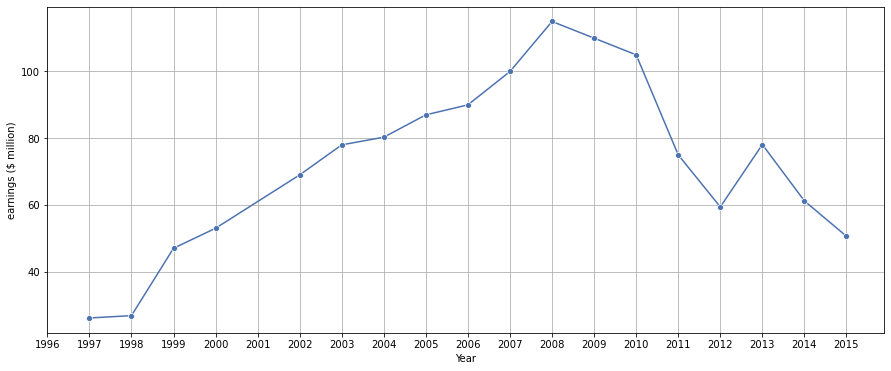

In [146]:
df1=df[df.Name=='Tiger Woods']
plt.figure(figsize=(15,6))
sns.lineplot(x=df1.Year,y=df1['earnings ($ million)'],marker='o')
plt.xticks(np.arange(1996,2016))
plt.grid(True)
plt.show()

In [ ]:
#As we can see from the plot, the earnings of Tiger Woods had been consistently increasing over the years till 2008. After 2008,
#we can clearly see a downfall in his earnings over the years. As seen in the news around 2010 he got divorced and there was a
#visible downfall in his earnings and performance.

### Q9. Display the distribution of the earnings of Tiger Woods. Comment on how the distribution looks like and interpret some insights from the plot.
[Hint : Use distplot]

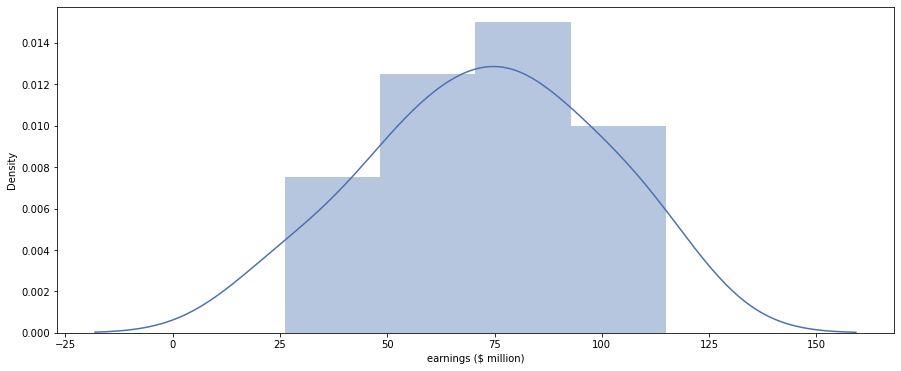

In [152]:
df1=df[df.Name=='Tiger Woods']
plt.figure(figsize=(15,6))
sns.distplot(df1['earnings ($ million)'])
plt.show()

In [153]:
df1['earnings ($ million)'].mean()

72.86111111111111

In [154]:
df1['earnings ($ million)'].median()

76.5

In [ ]:
#The distribution looks quite symmetric. As we can see the mean and the median are quite close to each other. The average
#earning of Tiger Woods is apx $73 million.

### Q10. Has the earnings of the richest athletes increased over the period of 30 years? Discuss the correlation between year and earnings.
[Hint : Use heatmap/scatterplot]

In [155]:
corr=df[['Year','earnings ($ million)']].corr()
corr

,Year,earnings ($ million)
Year,1.000000,0.638597
earnings ($ million),0.638597,1.000000


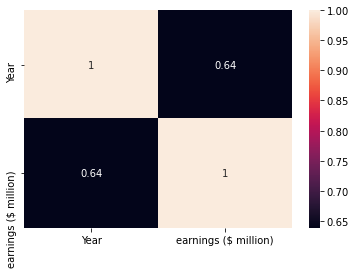

In [161]:
sns.heatmap(corr,annot=True)
plt.show()

In [162]:
#From the heatmap we can see that there is a positive correlation between earnings and year. This can also be verified from the
#scatterplot shown below.

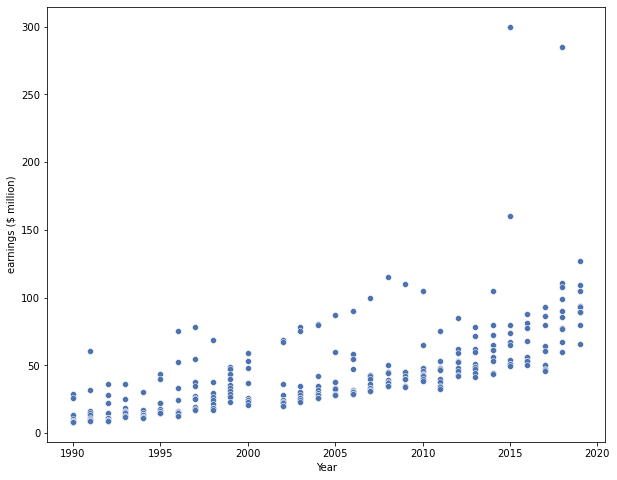

In [167]:
plt.figure(figsize=(10,8))
sns.scatterplot(df.Year,df['earnings ($ million)'])
plt.show()

### Q-11 Display the earnings trend over the years.
[Hint: use lineplot(), estimator = np.mean]

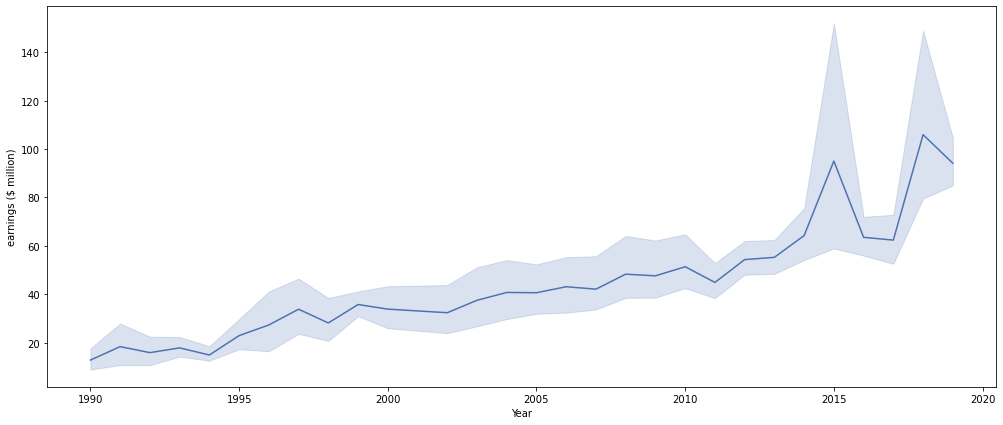

In [177]:
plt.figure(figsize=(17,7))
sns.lineplot(df['Year'],df['earnings ($ million)'],estimator=np.mean)
#estimator :name of pandas method or callable or None:
#Method for aggregating across multiple observations of the y variable at the same x level. If None, all observations will be
#drawn.
plt.show()

In [ ]:
#As we can see, over the years the average earnings of the billionares has been increasing.

                                            **Happy Learning**